In [4]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
train = pd.read_csv('./Social_Network_Ads.csv')

In [16]:
#visualizacion de la base de datos
train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
#datos que nos interesan
train[['BMI','Outcome']].head()

,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


<Axes: xlabel='Age', ylabel='Purchased'>

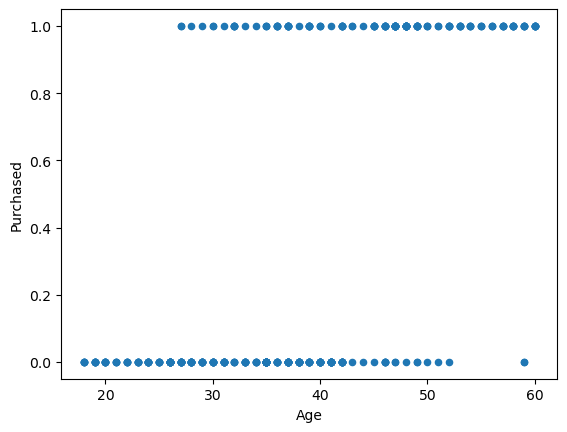

In [18]:
train[['Age','Purchased']].plot.scatter(x='Age',y='Purchased')

In [45]:
w=0.09
b=-4.00

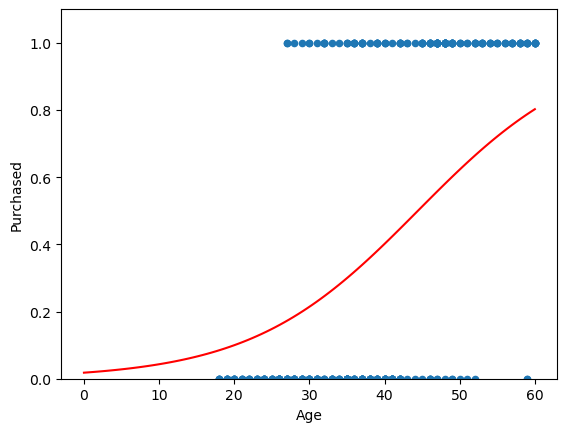

In [46]:
x = np.linspace(0,train['Age'].max(),100)
y= 1/(1+np.exp(-(w*x+b)))

#grafica de la recta
train.plot.scatter(x='Age',y='Purchased')
plt.plot(x,y,'-r')
plt.ylim(0,train['Purchased'].max()*1.1)
#plt.grid()
plt.show()

In [35]:
train['UserID'] = 1/(1+np.exp(-(train['Age']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['Purchased']*np.log(train['UserID'])-(1-train['Purchased'])*np.log(1-train['UserID'])
cost_j = train['loss_xi'].mean()
cost_j

0.43415072450024134

In [37]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [38]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [42]:
def sum_error_df(df):
    train['UserID'] = 1/(1+np.exp(-(train['Age']*df['w']+df['b'])))
    train['loss_xi'] = -train['Purchased']*np.log(train['UserID'])-(1-train['Purchased'])*np.log(1-train['UserID'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [43]:
df['error'] = df.apply(sum_error_df, axis=1)

In [44]:
df.sort_values(by=['error']).head()

,w,b,error
400,0.09,-4.00,0.467729
401,0.09,-3.99,0.467892
402,0.09,-3.98,0.468075
403,0.09,-3.97,0.468278
404,0.09,-3.96,0.468500
